In [ ]:
import os
print (os.getcwd())

In [ ]:
from overcooked_ai_py.agents.benchmarking import AgentEvaluator
from overcooked_ai_py.visualization.state_visualizer import StateVisualizer
from overcooked_ai_py.visualization.visualization_utils import show_image_in_ipython
from overcooked_ai_py.utils import generate_temporary_file_path
from overcooked_ai_py.mdp.overcooked_mdp import OvercookedGridworld
from overcooked_ai_py.visualization.pygame_utils import vstack_surfaces
import pygame
import numpy as np

pygame 2.1.2 (SDL 2.0.16, Python 3.9.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
state_visualizer = StateVisualizer()
def render_state(grid_txt):
    grid = [layout_row.strip() for layout_row in grid_txt.split("\n")]
    mdp = OvercookedGridworld.from_grid(grid)
    mdp.start_state = mdp.get_standard_start_state()
    print(mdp.start_state.all_orders)
    grid_surface = pygame.surface.Surface(state_visualizer._unscaled_grid_pixel_size(mdp.terrain_mtx))
    state_visualizer._render_grid_and_counter_goals(grid_surface, mdp.terrain_mtx, mdp.counter_goals)
    state_visualizer._render_players(grid_surface, mdp.start_state.players)
    hud_data =  state_visualizer.default_hud_data(mdp.start_state)
    hud_width = state_visualizer.width# or grid_surface2.get_width()
    hud_surface = pygame.surface.Surface((300, state_visualizer._calculate_hud_height(hud_data)))
    hud_surface.fill(state_visualizer.background_color)
    state_visualizer._render_hud_data(hud_surface, hud_data)
    rendered_surface = vstack_surfaces([grid_surface, hud_surface], state_visualizer.background_color)
    img_path = generate_temporary_file_path(prefix="overcooked_visualized_state_", extension=".png")
    pygame.image.save(rendered_surface, img_path)
    show_image_in_ipython(img_path, width=700) 

In [ ]:
state_visualizer = StateVisualizer()
def render_layout(grid_txt):
    grid = [layout_row.strip() for layout_row in grid_txt.split("\n")]
    mdp = OvercookedGridworld.from_grid(grid)
    mdp.start_state = mdp.get_standard_start_state()
    grid_surface = pygame.surface.Surface(state_visualizer._unscaled_grid_pixel_size(mdp.terrain_mtx))
    state_visualizer._render_grid_and_counter_goals(grid_surface, mdp.terrain_mtx, mdp.counter_goals)
    state_visualizer._render_players(grid_surface, mdp.start_state.players)
    img_path = generate_temporary_file_path(prefix="overcooked_visualized_state_", extension=".png")
    pygame.image.save(grid_surface, img_path)
    show_image_in_ipython(img_path, width=700) 

In [ ]:
grid_txt ="""XOXXXXXXDX
             X     Y  X
             X 1X  X  X
             X  X  X  X
             X  X     X
             X  X2    S
             X  X     X
             X  Y     X
             X  Y     X
             XPXXTXXXXX"""
render_layout(grid_txt)
render_state(grid_txt)

<IPython.core.display.Image object>
[('onion',), ('onion', 'onion'), ('onion', 'onion', 'onion'), ('tomato',), ('tomato', 'tomato'), ('tomato', 'tomato', 'tomato'), ('onion', 'tomato'), ('onion', 'onion', 'tomato'), ('onion', 'tomato', 'tomato')]
Traceback (most recent call last):
  File "/root/.vscode-server/extensions/ms-python.python-2025.2.0-linux-x64/python_files/python_server.py", line 133, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 12, in <module>
  File "<string>", line 8, in render_state
AttributeError: 'StateVisualizer' object has no attribute '_render_grid_and_counter_goals'



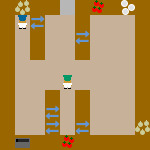

In [5]:
grid_txt ="""XOXXSXTXDX
             X1Y  X   X
             X X  Y   X
             X X  X   X
             X        X
             X   2    X
             X  X X   X
             X  Y X   X
             X  Y Y   O
             XPXXTXXXXX"""
render_layout(grid_txt)

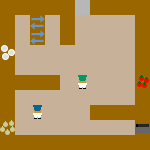

In [13]:
grid_txt = """XXXXXSXXXX
				X Y X    X
				X Y X    X
				D        X
				X        X
				XXXX 2   T
				X        X
				X 1   XXXX
				O        P
				XXXXXXXXXX"""
render_layout(grid_txt)

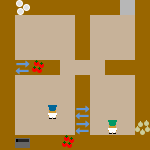

In [6]:
grid_txt ="""XDXXXXXXSX
             X    X   X
             X    X   X
             X    X   X
             XYTX   XXX
             X    X   X
             X    X   X
             X  1 Y   X
             X    Y 2 O
             XPXXTXXXXX"""
render_layout(grid_txt)

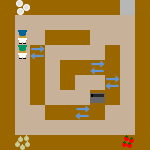

In [7]:
grid_txt ="""XDXXXXXXSX
             X        X
             X1 XXX   X
             X2Y    X X
             X X XXYX X
             X X X  Y X
             X X   PX X
             X  XXYX  X
             X        X
             XOXXXXXXTX"""
render_layout(grid_txt)

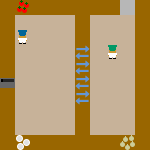

In [8]:
grid_txt ="""XTXXXXXXSX
             X    X   X
             X1   X   X
             X    Y 2 X
             X    Y   X
             P    Y   X
             X    Y   X
             X    X   X
             X    X   X
             XDXXXXXXOX"""
render_layout(grid_txt)